# Trabajo practico computacional

## Fuerza de vínculo




$$F_v = 3mg\cos{\theta}+2kR\sin^2{\theta}-kR$$

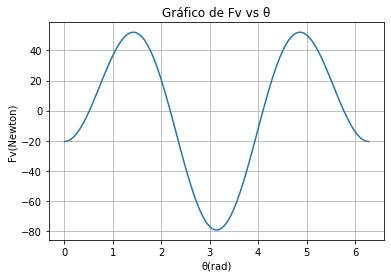

In [130]:
import numpy as np

from matplotlib import pyplot as plt
plt.ion()

# Definicion de constantes
pi = np.pi
g = 9.81

# Definicion de variables
m = 1
k = 50
R = 1
b = k*R

def θvsFv(m, θ, b):
      return 3*m*g*np.cos(θ) + 2*b*np.sin(θ)*np.sin(θ) - b
    
θ = np.linspace(0,2*pi,100)
y = θvsFv(m, θ, b)

plt.plot(θ,y)
plt.xlabel('θ(rad)')
plt.ylabel('Fv(Newton)')
plt.title('Gráfico de Fv vs θ')
plt.grid()

## Puntos de equilibrio

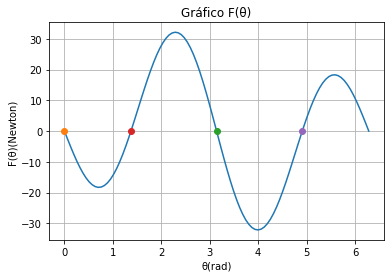

In [131]:
def ecuacion_de_movimiento(θ, k, m, R):
      return np.sin(θ)*(g/R - (k/m)*np.cos(θ))

y = ecuacion_de_movimiento(θ, k, m, R)

ceros = [
    [0, 0],
    [pi, 0],
    [np.arccos(m*g/(k*R)), 0],
    [2*pi - np.arccos(m*g/(k*R)), 0]
]

plt.plot(θ,y)
plt.xlabel('θ(rad)')
plt.ylabel('F(θ)(Newton)')
plt.title('Gráfico F(θ)')
plt.grid()

for cero in ceros:
    plt.plot([cero[0]],[cero[1]], 'o')

## Solución numérica

In [132]:
from scipy.integrate import odeint

theta_0 = 0
thetap_0 = 0.1

X0 = [theta_0, thetap_0]

class Solucion_numerica:
    def __init__(self):
        self.m = 1
        self.k = 50
        self.R = 1
        self.b = k*R
        self.t_i = 0 # tiempo inicial
        self.t_f = 8 # tiempo final
        self.dt = 0.01
        self.theta_0 = 0
        self.thetap_0 = 0.1
    
    def get_solucion_odeint(self):
        t_array = np.linspace(self.t_i, self.t_f, (self.t_f-self.t_i)/dt)
        X0 = [self.theta_0, self.thetap_0]
        dθpdt = lambda t, theta, thetap: (g/R) * np.sin(theta) - (k/m) * np.sin(theta) * np.cos(theta)
        dθdt = lambda t, theta, thetap: thetap
        ecdif = lambda X,t: [dθdt(t, X[0], X[1]), dθpdt(t, X[0], X[1])] #X[0] = theta, X[1] = thetap
        return [odeint(ecdif, X0, t_array), t_array]
    
    def plot(self, title, lev, oscilaciones, is_sinh):
        solucion, t_array = self.get_solucion_odeint()
        theta_odeint = solucion[:,0]
        plt.plot(t_array, theta_odeint, '-', label='Odeint', lw=lev)
        plt.xlabel('tiempo (s)')
        plt.ylabel('θ (rad)')
        plt.grid()
        plt.title(title)
        if(oscilaciones != None):
            if(is_sinh):
                oscilaciones.plot(t_array, 4)
            else:
                oscilaciones.plot(t_array, 4)
        
    def set_m(self, value):
        self.m = value
        
    def set_k(self, value):
        self.k = value
        self.b = k*R
    
    def set_R(self, value):
        self.R = value
        self.b = k*R
        
    def set_t_i(self, value):
        self.t_i = value
    
    def set_t_f(self, value):
        self.t_f = value
    
    def set_dt(self, value):
        self.dt = value
        
    def set_theta_0(self, value):
        self.theta_0 = value
        
    def set_thetap_0(self, value):
        self.thetap_0 = value
        
    def get_m(self):
        return self.m
        
    def get_k(self):
        return self.k
    
    def get_R(self):
        return self.R
    
    def get_b(self):
        return self.b

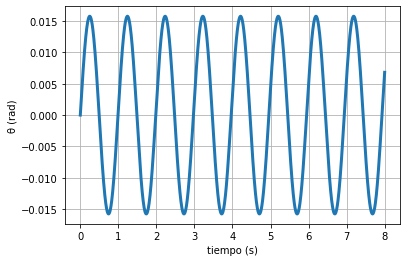

In [133]:
solucion_numerica_1 = Solucion_numerica()
solucion_numerica_1.plot("", 3, None, False)

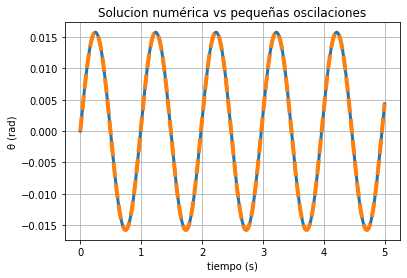

In [134]:
#Item C

class Pequeñas_oscilaciones:
    def __init__(self, omega_0, A, phi):
        self.omega_0 = omega_0
        self.A = A
        self.phi = phi
        
    def plot(self, t_array, lev):
        tita_aprox = self.A*np.cos(self.omega_0*t_array + self.phi)
        plt.plot(t_array, tita_aprox, '--', lw=lev)
        
    def plot_with_sinh(self, t_array, lev):
        tita_aprox = A*np.sinh(omega_0*t_array + phi)
        plt.plot(t_array, tita_aprox, '--', lw=lev)
    
    def set_omega_0(self, value):
        self.omega_0 = value
        
    def set_A(self, value):
        self.A = value
    
    def set_phi(self, value):
        self.phi = value

    def get_omega_0(self):
        return self.omega_0
    
    def get_A(self):
        return self.A
    
    def get_phi(self):
        return self.phi
    
solucion_numerica_1.set_dt(0.00625)
solucion_numerica_1.set_t_i(0)
solucion_numerica_1.set_t_f(5)

omega_0 = np.sqrt(k/m - g/R)
A = -thetap_0/omega_0
phi = np.pi/2
oscilaciones_1 = Pequeñas_oscilaciones(omega_0, A, phi)

solucion_numerica_1.plot("Solucion numérica vs pequeñas oscilaciones", 3, oscilaciones_1, False)


# Pequeñas oscilaciones

#tita_aprox = A*np.cos(omega_0*t_array + phi)

#plt.plot(t_array, tita_aprox, '--', label='osci', lw=4)

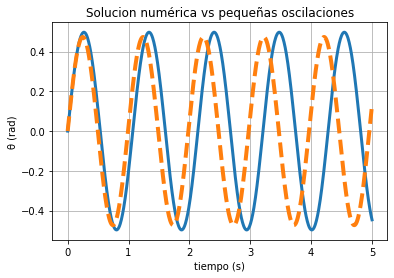

In [135]:
thetap_0_aux = 3
omega_0 = np.sqrt(k/m - g/R)
A = -thetap_0_aux/omega_0
phi = np.pi/2
oscilaciones_2 = Pequeñas_oscilaciones(omega_0, A, phi)

solucion_numerica_1.set_thetap_0(thetap_0_aux)
solucion_numerica_1.plot("Solucion numérica vs pequeñas oscilaciones", 3, oscilaciones_2, False)

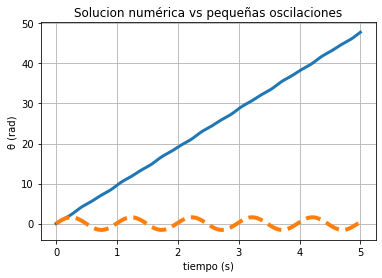

In [136]:
thetap_0_aux = 10
omega_0 = np.sqrt(k/m - g/R)
A = -thetap_0_aux/omega_0
phi = np.pi/2
oscilaciones_3 = Pequeñas_oscilaciones(omega_0, A, phi)

solucion_numerica_1.set_thetap_0(10)
solucion_numerica_1.plot("Solucion numérica vs pequeñas oscilaciones", 3, oscilaciones_3, False)

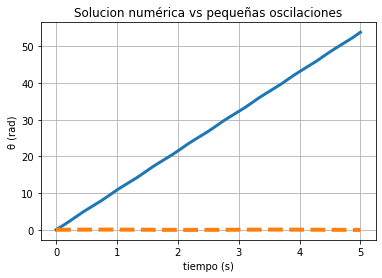

In [137]:
#D

k = 5

thetap_0_aux = 0.1
omega_0 = np.sqrt(g/R-k/m)
A = -thetap_0_aux/omega_0
phi = np.pi/2
oscilaciones_4 = Pequeñas_oscilaciones(omega_0, A, phi)

solucion_numerica_1.set_thetap_0(10)
solucion_numerica_1.set_k(5)
solucion_numerica_1.plot("Solucion numérica vs pequeñas oscilaciones", 3, oscilaciones_4, True)